In [2]:
import json
import matplotlib.pyplot as plt
import matplotlib



# Load from files and pre-process data

In [59]:
compression_rates=[1,2,4,8,16,32,64]

architectures = ['cnn']
structures = ['structured', 'unstructured']
methods = ['random', 'magnitude']
scopes = ['local', 'global']
result_types = ['accuracies', 'pgd-success', 'cw2-success', 'bb0-success']
results = dict()

for architecture in architectures:
    for structure in structures:
        for method in methods:
            for scope in scopes:
                for result_type in result_types:
                    file_name = f'{architecture}-{method}-{scope}-{structure}-{result_type}.json'
                    try:
                        with open(f'saved-results/{file_name}', 'r') as f:
                            res = json.load(f)
                            
                            if 'accuracies' in file_name:
                                
                                avg = get_average(res, res_type='accuracies')
                            elif 'bb0' in file_name:
                                avg = get_average(res, res_type='bb0' )
                                
                            elif 'pgd' in file_name:
                                avg = get_average(res,res_type='pgd' )
                            elif 'cw2' in file_name:
                                avg = get_average(res, res_type='cw2')
                                
                                
                            results[f'{architecture}-{method}-{scope}-{structure}-{result_type}'] = avg
                    except Exception as err:

                        print(err, file_name)

[Errno 2] No such file or directory: 'saved-results/cnn-random-local-structured-accuracies.json' cnn-random-local-structured-accuracies.json
[Errno 2] No such file or directory: 'saved-results/cnn-random-local-structured-pgd-success.json' cnn-random-local-structured-pgd-success.json
[Errno 2] No such file or directory: 'saved-results/cnn-random-local-structured-cw2-success.json' cnn-random-local-structured-cw2-success.json
[Errno 2] No such file or directory: 'saved-results/cnn-random-local-structured-bb0-success.json' cnn-random-local-structured-bb0-success.json
[Errno 2] No such file or directory: 'saved-results/cnn-random-global-structured-accuracies.json' cnn-random-global-structured-accuracies.json
[Errno 2] No such file or directory: 'saved-results/cnn-random-global-structured-pgd-success.json' cnn-random-global-structured-pgd-success.json
[Errno 2] No such file or directory: 'saved-results/cnn-random-global-structured-cw2-success.json' cnn-random-global-structured-cw2-success.js

In [74]:
file_name = 'cnn-random-local-unstructured-bb0-success.json'
with open(f'saved-results/{file_name}', 'r') as f:
    epsilon = 10
    res = json.load(f)
    print(res[0][0][0])
    success = [True if x<epsilon else False for x in res[0][0][0]]
    print(success)
    print(sum(success)/len(success))



[32, 16, 6, 10, 18, 8, 5, 23, 6, 14]
[False, False, True, False, False, True, True, False, True, False]
0.4


# Helper Functions

In [58]:
def get_average(all_values, res_type):#accuracies=False, bb0=False):
    value_per_pruning_rate=[]
    for i in range(len(all_values)):
        for j in range(len(all_values[i])):
            
            try:

                if res_type == 'cw2' or res_type == 'pgd':
                    value_per_pruning_rate[j].append(all_values[i][j])
                if res_type == 'accuracies':
                    value_per_pruning_rate[j].append(all_values[i][j][1])
                if res_type == 'bb0':
                    value_per_pruning_rate[j].append(all_values[i][j][0][0])
            except:
                value_per_pruning_rate.append([])
                if res_type == 'cw2' or res_type == 'pgd':
                    value_per_pruning_rate[j].append(all_values[i][j])
                if res_type == 'accuracies':
                    value_per_pruning_rate[j].append(all_values[i][j][1])
                if res_type == 'bb0':
                    value_per_pruning_rate[j].append(all_values[i][j][0])
                    
    if res_type == 'bb0':
        avg_value_per_pruning_rate = [sum(x[0])/len(x[0]) for x in value_per_pruning_rate]
    else:
        avg_value_per_pruning_rate = [sum(x)/len(x) for x in value_per_pruning_rate]
    return avg_value_per_pruning_rate


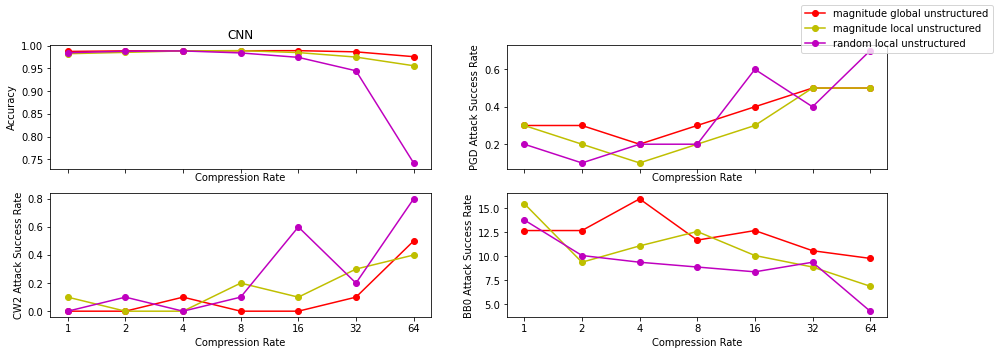

In [61]:

fig, (ax) = plt.subplots(2,2,figsize=(15,5), sharex=True)
matplotlib.rcParams['xtick.minor.size'] = 0
matplotlib.rcParams['xtick.minor.width'] = 0


#ax[0,0].plot(compression_rates, results['cnn-magnitude-global-structured-accuracies'],'go-',label='magnitude global struct')
ax[0,0].plot(compression_rates, results['cnn-magnitude-global-unstructured-accuracies'],'ro-', label='magnitude global unstructured')
#ax[0,0].plot(compression_rates, results['cnn-magnitude-local-structured-accuracies'],'bo-', label='magnitude local struct')
ax[0,0].plot(compression_rates, results['cnn-magnitude-local-unstructured-accuracies'],'yo-', label='magnitude local unstructured')
#ax[0,0].plot(compression_rates, results['cnn-random-local-structured-accuracies'],'co-', label='random local struct')
ax[0,0].plot(compression_rates, results['cnn-random-local-unstructured-accuracies'],'mo-', label='random local unstructured')

ax[0,0].set(title='CNN',ylabel='Accuracy', xlabel='Compression Rate')

#ax[1,0].plot(compression_rates, results['cnn-magnitude-global-structured-cw2-success'],'go-',label='magnitude global struct')
ax[1,0].plot(compression_rates, results['cnn-magnitude-global-unstructured-cw2-success'],'ro-', label='magnitude global unstructured')
#ax[1,0].plot(compression_rates, results['cnn-magnitude-local-structured-cw2-success'],'bo-', label='magnitude local struct')
ax[1,0].plot(compression_rates, results['cnn-magnitude-local-unstructured-cw2-success'],'yo-', label='magnitude local unstructured')
#ax[1,0].plot(compression_rates, results['cnn-random-local-structured-cw2-success'],'co-', label='random local struct')
ax[1,0].plot(compression_rates, results['cnn-random-local-unstructured-cw2-success'],'mo-', label='random local unstructured')

ax[1,0].set(title='',ylabel='CW2 Attack Success Rate', xlabel='Compression Rate')

#ax[0,1].plot(compression_rates, results['cnn-magnitude-global-structured-pgd-success'],'go-',label='magnitude global struct')
ax[0,1].plot(compression_rates, results['cnn-magnitude-global-unstructured-pgd-success'],'ro-', label='magnitude global unstructured')
#ax[0,1].plot(compression_rates, results['cnn-magnitude-local-structured-pgd-success'],'bo-', label='magnitude local struct')
ax[0,1].plot(compression_rates, results['cnn-magnitude-local-unstructured-pgd-success'],'yo-', label='magnitude local unstructured')
#ax[0,1].plot(compression_rates, results['cnn-random-local-structured-pgd-success'],'co-', label='random local struct')
ax[0,1].plot(compression_rates, results['cnn-random-local-unstructured-pgd-success'],'mo-', label='random local unstructured')

ax[0,1].set(title='',ylabel='PGD Attack Success Rate', xlabel='Compression Rate')

#ax[1,1].plot(compression_rates, results['cnn-magnitude-global-structured-bb0-success'],'go-',label='magnitude global struct')
ax[1,1].plot(compression_rates, results['cnn-magnitude-global-unstructured-bb0-success'],'ro-', label='magnitude global unstructured')
#ax[1,1].plot(compression_rates, results['cnn-magnitude-local-structured-bb0-success'],'bo-', label='magnitude local struct')
ax[1,1].plot(compression_rates, results['cnn-magnitude-local-unstructured-bb0-success'],'yo-', label='magnitude local unstructured')
#ax[1,1].plot(compression_rates, results['cnn-random-local-structured-bb0-success'],'co-', label='random local struct')
ax[1,1].plot(compression_rates, results['cnn-random-local-unstructured-bb0-success'],'mo-', label='random local unstructured')

ax[1,1].set(title='',ylabel='BB0 Attack Success Rate', xlabel='Compression Rate')

# format xscale
ax[1,0].set_xscale('log')
ax[1,0].set_xticks(compression_rates)

ax[1,0].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, )#loc='upper center')

plt.show()

In [68]:
results['cnn-magnitude-local-struct-accuracies']

[0.9856200039386749,
 0.985999995470047,
 0.986570006608963,
 0.9870000064373017,
 0.9871300041675568,
 0.987550002336502,
 0.9877900063991547]

In [64]:
results

{'cnn-random-local-unstructured-accuracies': [0.9843999743461609,
  0.9876000285148621,
  0.9883000254631042,
  0.9839000105857849,
  0.9742000102996826,
  0.9447000026702881,
  0.7422999739646912],
 'cnn-random-local-unstructured-pgd-success': [0.2,
  0.1,
  0.2,
  0.2,
  0.6,
  0.4,
  0.7],
 'cnn-random-local-unstructured-cw2-success': [0.0,
  0.1,
  0.0,
  0.1,
  0.6,
  0.2,
  0.8],
 'cnn-random-local-unstructured-bb0-success': [13.8,
  10.1,
  9.4,
  8.9,
  8.4,
  9.4,
  4.3],
 'cnn-magnitude-local-unstructured-accuracies': [0.982200026512146,
  0.9850999712944031,
  0.9883999824523926,
  0.9890000224113464,
  0.9847000241279602,
  0.9747999906539917,
  0.9557999968528748],
 'cnn-magnitude-local-unstructured-pgd-success': [0.3,
  0.2,
  0.1,
  0.2,
  0.3,
  0.5,
  0.5],
 'cnn-magnitude-local-unstructured-cw2-success': [0.1,
  0.0,
  0.0,
  0.2,
  0.1,
  0.3,
  0.4],
 'cnn-magnitude-local-unstructured-bb0-success': [15.5,
  9.4,
  11.1,
  12.6,
  10.1,
  8.9,
  6.9],
 'cnn-magnitude

In [7]:
results

{}